In [1]:
%load_ext autoreload
%autoreload 2

# set up env

In [2]:
# for Tina machine only, to import .py from src/ds/
import os
current_workpath = os.getcwd()
print("Current workpath:", current_workpath)

parent_folder = os.path.dirname(current_workpath)
print("Parent_folder:", parent_folder)

import sys
sys.path.append(parent_folder+'/src')
print(sys.path[-1])

Current workpath: /home/tina4aiml/dev/notebooks
Parent_folder: /home/tina4aiml/dev
/home/tina4aiml/dev/src


In [3]:
rawfile_name = 'beer_reviews'
rawfile_format = '.csv'
rawfile_path = "../data/raw/"
datadict_path = "../references/Data_Dict.csv"

interim_folder_path = "../data/interim/"
processed_folder_path  ="../data/processed/"
model_folder_path = "../models/"

# import split datasets

In [4]:
from ds.data.sets import load_sets_v2

In [5]:
X_train_v2, y_train_v2, X_val_v2, y_val_v2, X_test_v2, y_test_v2 = load_sets_v2(path='../data/processed/', suffix='_v2')

In [6]:
# Check if the datasets were loaded successfully
if X_train_v2 is not None:
    print("X_train_v2 shape:", X_train_v2.shape) # (951968, 6)
else:
    print("X_train_v2 file not found")

if y_train_v2 is not None:
    print("y_train_v2 shape:", y_train_v2.shape) #(951968,)
else:
    print("y_train_v2 file not found") 

if X_val_v2 is not None:
    print("X_val_v2 shape:", X_val_v2.shape) # (317323, 6)
else:
    print("X_val_v2 file not found")

if y_val_v2 is not None:
    print("y_val_v2 shape:", y_val_v2.shape) # (317323,)
else:
    print("y_val_v2 file not found")

if X_test_v2 is not None:
    print("X_test_v2 shape:", X_test_v2.shape) # (317323, 6)
else:
    print("X_test_v2 file not found")

if y_test_v2 is not None:
    print("y_test_v2 shape:", y_test_v2.shape) # (317323,)
else:
    print("y_test_v2 file not found")

X_train_v2 shape: (951968, 6)
y_train_v2 shape: (951968,)
X_val_v2 shape: (317323, 6)
y_val_v2 shape: (317323,)
X_test_v2 shape: (317323, 6)
y_test_v2 shape: (317323,)


In [7]:
import pandas as pd
import numpy as np

In [8]:
data_dict = pd.read_csv(datadict_path)
features_label = data_dict.loc[data_dict['API Expected Parameter'] == 'Yes', 'Column'].tolist()
features_label

['brewery_name',
 'review_aroma',
 'review_appearance',
 'review_palate',
 'review_taste',
 'beer_abv']

In [9]:
np.save(processed_folder_path + "/features_label.npy", features_label)

In [10]:
features_label = np.load(processed_folder_path+'features_label.npy',allow_pickle=True)
features_label_n = len(features_label)
features_label_n 

6

In [11]:
target_class = np.load(processed_folder_path+'beer_style.npy',allow_pickle=True)
target_class_n = len(target_class)
target_class_n 

104

# Neural Network Architecture

In [12]:
import tensorflow as tf

tf.keras.utils.set_random_seed(1)

input_shape = (features_label_n,)
num_classes = target_class_n

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_v2, y_train_v2, epochs=10, batch_size=32, validation_data=(X_val_v2, y_val_v2))

2023-07-07 00:11:14.965898: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-07 00:11:15.151922: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 00:11:17.661107: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-07 00:11:17.703611: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA no

Epoch 1/10


2023-07-07 00:11:25.824960: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-07 00:11:25.834312: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f110cc7d950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-07 00:11:25.834367: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-07-07 00:11:25.847189: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-07 00:11:26.097993: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-07 00:11:26.302165: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifeti

29749/29749 [==============================] - 138s 4ms/step - loss: 3.3165 - accuracy: 0.1848 - val_loss: 3.2220 - val_accuracy: 0.1944
Epoch 2/10
29749/29749 [==============================] - 141s 5ms/step - loss: 3.1847 - accuracy: 0.2026 - val_loss: 3.1498 - val_accuracy: 0.2101
Epoch 3/10
29749/29749 [==============================] - 132s 4ms/step - loss: 3.1288 - accuracy: 0.2142 - val_loss: 3.1055 - val_accuracy: 0.2211
Epoch 4/10
29749/29749 [==============================] - 127s 4ms/step - loss: 3.0883 - accuracy: 0.2242 - val_loss: 3.0800 - val_accuracy: 0.2266
Epoch 5/10
29749/29749 [==============================] - 131s 4ms/step - loss: 3.0579 - accuracy: 0.2318 - val_loss: 3.0450 - val_accuracy: 0.2360
Epoch 6/10
29749/29749 [==============================] - 146s 5ms/step - loss: 3.0342 - accuracy: 0.2372 - val_loss: 3.0269 - val_accuracy: 0.2398
Epoch 7/10
29749/29749 [==============================] - 132s 4ms/step - loss: 3.0146 - accuracy: 0.2430 - val_loss: 3.013

In [13]:
# Save the model history to a file
import pickle
with open('model_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [14]:
from joblib import dump

dump(model, model_folder_path + 'NNM_Tina_v1.joblib')

['../models/NNM_Tina_v1.joblib']

In [15]:
y_train_v2_pred_probs = model.predict(X_train_v2)
y_train_v2_pred = y_train_v2_pred_probs.argmax(axis=1)

29749/29749 [==============================] - 37s 1ms/step


In [16]:
y_train_v2_pred.shape

(951968,)

In [17]:
y_train_v2_pred

array([ 1,  9, 12, ..., 11, 39, 98])

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train_v2, y_train_v2_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.2599593683821305


In [ ]:
y_train_v2_pred_probs = model.predict(X_train_v2)
y_train_v2_pred = y_train_v2_pred_probs.argmax(axis=1)

In [44]:
y_test_v2_pred_probs = model.predict(X_test_v2)
y_test_v2_pred = y_test_v2_pred_probs.argmax(axis=1)

9917/9917 [==============================] - 14s 1ms/step


In [45]:
accuracy = accuracy_score(y_test_v2, y_test_v2_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.2584086246505926


In [19]:
# baseline: Xgboost model is 0.29106304932198424
# accuracy is low might becasue we hash the brewey_name in 10 groups. 'MemoryError' when try to hash all with HashingVectorizer() from sklearn.feature_extraction.text.

# no validation defined 'brewery_name' bucket increase to 10, KNN nearby 5,in the model Test accuracy: 0.24678009748458862
# with validation dataset in the model , 'brewery_name' bucket increase to 10, KNN nearby 5, test accuracy:0.24332934617996216
# with validation ds defined, 'brewery_name' bucket increase to 1000, KNN nearby increase to 10, Accuracy: 0.2584086246505926

# plot the performance

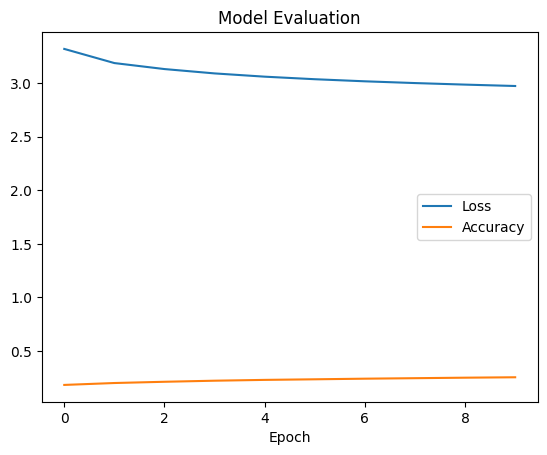

In [20]:
import matplotlib.pyplot as plt

# Plot model evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Evaluation')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'])
plt.show()

# Explain the before and after

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [22]:
y_val_v2_pred_probs = model.predict(X_val_v2)
y_val_v2_pred = y_val_v2_pred_probs.argmax(axis=1)

9917/9917 [==============================] - 12s 1ms/step


In [23]:
y_val_v2_pred

array([  1,   9, 103, ...,  44,   9, 100])

In [24]:
y_val_v2

array([16, 60, 65, ..., 47,  9, 19])

In [25]:
performance = accuracy_score(y_val_v2, y_val_v2_pred)

In [26]:
performance

0.2592910063247858

In [28]:
from sklearn.preprocessing import LabelEncoder
from joblib import load

# Load the LabelEncoder object
label_encoder = load(model_folder_path+'label_encoder.joblib')

encoded_labels = label_encoder.transform(y_val_v2)

ValueError: y contains previously unseen labels: 16

In [36]:
y_val_v2_pred_uni = np.unique(y_val_v2_pred, axis=None)

In [37]:
y_val_v2_uni = np.unique(y_val_v2, axis=None)

In [40]:
difference = np.setdiff1d(y_val_v2_uni, y_val_v2_pred_uni)

# Check which elements in difference are present in y_val_v2_uni
in_y_val_v2_uni = np.in1d(difference, y_val_v2_uni)

# Check which elements in difference are present in y_val_v2_pred_uni
in_y_val_v2_pred_uni = np.in1d(difference, y_val_v2_pred_uni)

# Print the elements and their source
for i, val in enumerate(difference):
    if in_y_val_v2_uni[i]:
        print(val, "from y_val_v2_uni")
    elif in_y_val_v2_pred_uni[i]:
        print(val, "from y_val_v2_pred_uni")

0 from y_val_v2_uni
6 from y_val_v2_uni
8 from y_val_v2_uni
23 from y_val_v2_uni
29 from y_val_v2_uni
32 from y_val_v2_uni
38 from y_val_v2_uni
46 from y_val_v2_uni
48 from y_val_v2_uni
50 from y_val_v2_uni
51 from y_val_v2_uni
52 from y_val_v2_uni
56 from y_val_v2_uni
57 from y_val_v2_uni
64 from y_val_v2_uni
68 from y_val_v2_uni
70 from y_val_v2_uni
71 from y_val_v2_uni
88 from y_val_v2_uni
91 from y_val_v2_uni
95 from y_val_v2_uni
97 from y_val_v2_uni


In [41]:
#original_target_encoded = df_prep_imputed['beer_style'].unique()
original_target_encoded = [ 65,  51,  59,  61,   9,  66,  76,  83,  15,  87,  14,  17,  25,
        12,  18,  89,   2,  19,  82,   1,   6,  53,  44,  94,  60,  11,
        24,  43,  49,  67,   4,  26,  37,  78,  85,  38,  54,  52,  77,
       100,  55,  31,  46,   0,  73,  80,  90,  16,  79,  93,  99,   3,
        95, 103,   5,  92,  42,  45,  33,  36,  47,  23,  98,  57,   7,
       102,  97,  39,  58,  40,  88,  70,  22,  29,  69,  30,  68,  34,
        50,  35,  20,  10,  96, 101,   8,  13,  21,  81,  71,  48,  74,
        84,  86,  32,  75,  41,  27,  72,  56,  63,  62,  64,  91,  28]

In [43]:
# Calculate the difference
difference = np.setdiff1d(y_val_v2_uni, original_target_encoded)

# Check if there is any difference
if difference.size == 0:
    print("No difference between y_val_v2_uni and original_target_encoded")
else:
    # Check which elements in difference are present in original_target_encoded
    in_original_target_encoded_uni = np.in1d(difference, original_target_encoded)

    # Check which elements in difference are present in y_val_v2_pred_uni
    in_y_val_v2_pred_uni = np.in1d(difference, y_val_v2_pred_uni)

    # Print the elements and their source
    for i, val in enumerate(difference):
        if in_original_target_encoded_uni[i]:
            print(val, "from original_target_encoded")
        elif in_y_val_v2_pred_uni[i]:
            print(val, "from y_val_v2_pred_uni")

No difference between y_val_v2_uni and original_target_encoded


Issue:
1) unable to convert the encoded label of the validation prediction back to text, as y contains previously unseen labels: 16, but all of them are from the validation dataset.
1.2) check the label encorder, no difference

In [ ]:
df_val_v2_pred = pd.concat([X_val_v2, encoded_labels], axis=1)

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_train_v2, y_train_v2, scoring='accuracy')
importances = result.importances_mean